<a href="https://colab.research.google.com/github/elizabeth-16/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['kiwi','mango']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=105)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[0.1,1,10,100],'kernel':['linear']},
              {'C':[0.11,1,10,100],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.11, 1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [4]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [5]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
accuracy_score(y_pred,y_test)

0.7777777777777778

In [8]:
confusion_matrix(y_pred,y_test)

array([[8, 2],
       [2, 6]])

In [9]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.75      0.75      0.75         8

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



In [10]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
2,0.921569,0.921569,0.921569,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.916444,0.916444,0.916444,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.916863,0.916863,0.916863,0.917647,0.917647,0.917647,0.917647,0.917647,0.917647,0.913725,0.913725,0.913725,0.913725,0.913725,0.913725,0.917647,0.917647,0.917647,0.921569,...,0.882353,0.881438,0.881438,0.882353,0.881438,0.881438,0.881438,0.881438,0.881438,0.881438,0.881438,0.881438,0.882353,0.882353,0.882353,0.886275,0.886275,0.886275,0.898564,0.898564,0.898564,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0.905882,0
3,0.942854,0.967777,0.990850,0.948558,0.972549,0.991503,0.946943,0.970588,0.991503,0.942484,0.968627,0.991503,0.950133,0.971968,0.991503,0.958170,0.976471,0.991503,0.965359,0.980144,0.994928,0.965359,0.978431,0.991503,0.964706,0.975438,0.991159,0.955916,0.965281,0.989312,0.951269,0.956863,0.988235,0.948366,0.952188,0.986677,0.947124,0.951993,0.986612,0.945098,...,0.893083,0.931046,0.986928,0.888235,0.929412,0.986928,0.874562,0.919961,0.984967,0.870332,0.912510,0.983660,0.875098,0.918392,0.984562,0.875346,0.920353,0.984967,0.878026,0.924275,0.985621,0.881699,0.926235,0.985869,0.881100,0.923693,0.985621,0.871220,0.913725,0.983660,0.868876,0.908588,0.983007,0.868876,0.908588,0.983007,0.868627,0.907843,0.983007,0
4,0.949020,0.937255,0.756863,0.952941,0.941351,0.757098,0.956863,0.949153,0.775007,0.955320,0.960877,0.813072,0.952941,0.971686,0.816549,0.952941,0.968638,0.863582,0.949020,0.987768,0.921748,0.949255,0.992322,0.978110,0.952941,0.996078,0.996078,0.952941,0.997464,0.996078,0.952941,1.000000,1.000000,0.956863,1.000000,1.000000,0.956863,1.000000,1.000000,0.956863,...,0.921569,0.874510,0.800000,0.905908,0.874510,0.792157,0.894118,0.863409,0.799765,0.898275,0.854902,0.788235,0.886510,0.850980,0.788235,0.878667,0.839216,0.792157,0.886275,0.839216,0.772519,0.886275,0.827634,0.757270,0.878248,0.819608,0.764889,0.866667,0.811765,0.766248,0.854902,0.803922,0.749153,0.851042,0.796253,0.737255,0.854902,0.776706,0.725705,0
5,0.254902,0.152941,0.113725,0.266667,0.152941,0.

In [11]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [12]:
model = pickle.load(open('img_model.p','rb'))

Enter URLhttps://img.freepik.com/free-photo/close-up-view-mangoes-fruit-mango-cut-cubes-isolated_67155-6571.jpg?size=626&ext=jpg&ga=GA1.2.1720694697.1619222400
(351, 626, 3)
PREDICTED OUTPUT : mango


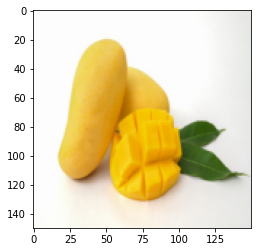

In [15]:
flat_data = []
url = input('Enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')